In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
data = pd.read_csv('data.csv')
data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [205]:
#Definding our x and y values respectively

x = data.drop(['Outcome'],axis =1)
y = data['Outcome']

In [206]:
#Converting to numpy array to feed into model

x = x.to_numpy()
y = y.to_numpy()

print("Shape of x: ",x.shape)
print("Shape of y: ",y.shape)


Shape of x:  (768, 8)
Shape of y:  (768,)


In [207]:
#Seperating data into training testing and validation set 70:20:10 (train:test:val)

train = int(0.7*768)
test = int(0.2*768)
val = 768 - train - test 

train_x = x[0:train]
train_y = y[0:train]

test_x = x[train:test+train]
test_y = y[train:test+train]

val_x = x[train+test:]
val_y = y[train+test:]


a. Performing Logistic regression and plotting loss vs iter and acc vs itr

In [210]:
class LogisticRegression:

    def __init__(self, learning_rate, epochs,verbose):
        self.learning_rate = learning_rate
        self.b = 0.01
        self.epochs = epochs
        self.w = np.ones(x.shape[1])
        self.v = verbose

    def sigmoid(self, z):
        return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

    def forward_pass(self, x):
        z = np.dot(x, self.w) + self.b
        predictions = self.sigmoid(z)
        return predictions

    def binary_cross_entropy(self, pred):
        loss = -1*self.y * np.log(pred + 1e-9) - (1 - self.y) * np.log(1 - pred + 1e-9)
        return np.mean(loss)

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.n = x.shape[0]
        self.loss = []
        self.accuracy = []  # Array to store accuracy values

        for epoch in range(self.epochs):
            predictions = self.forward_pass(x)
            dw = (1 / self.n) * np.dot(self.x.T, (predictions - self.y))
            db = (1 / self.n) * np.sum(predictions - self.y)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            l = self.binary_cross_entropy(predictions)
            self.loss.append(l)

            accuracy = self.compute_accuracy(predictions, y)
            self.accuracy.append(accuracy)

            if(self.v):
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {l:.4f}, Accuracy: {accuracy:.4f}, Learning Rate: {self.learning_rate:.6f}")

    def compute_accuracy(self, predictions, y):
        predicted_labels = np.where(predictions >= 0.5, 1, 0)
        correct_predictions = np.sum(predicted_labels == y)
        accuracy = correct_predictions / len(y)
        return accuracy

    def plot(self):
        plt.subplot(2,1,1)
        plt.plot(lr.loss)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss vs. Iteration')
        
        
        plt.subplot(2,1,2)
        plt.plot(lr.accuracy)
        plt.xlabel('Iteration')
        plt.ylabel('accuracy')
        plt.title('Accuracy vs. Iteration')
        
        plt.tight_layout()
        plt.show()


    def predict(self, data):
        z = np.dot(data, self.w) + self.b
        predictions = self.sigmoid(z)
        return np.where(predictions >= 0.5, 1, 0)


In [213]:
lr = LogisticRegression(0.0001,10000,True)

lr.fit(train_x,train_y)

/tmp/ipykernel_9584/3011350643.py:11: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
/tmp/ipykernel_9584/3011350643.py:11: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


Epoch 1/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 2/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 3/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 4/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 5/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 6/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 7/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 8/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 9/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 10/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 11/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 12/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 13/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 14/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Ra

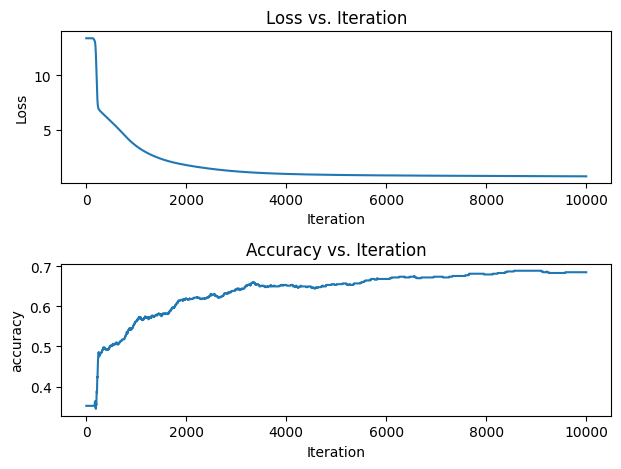

In [214]:
#training loss vs training accuracy

lr.plot()

In [215]:
# training on validation dataset
lr.fit(val_x,val_y)


Epoch 1/10000, Loss: 0.8611, Accuracy: 0.6410, Learning Rate: 0.000100
Epoch 2/10000, Loss: 0.8540, Accuracy: 0.6538, Learning Rate: 0.000100
Epoch 3/10000, Loss: 0.8502, Accuracy: 0.6538, Learning Rate: 0.000100
Epoch 4/10000, Loss: 0.8475, Accuracy: 0.6538, Learning Rate: 0.000100
Epoch 5/10000, Loss: 0.8455, Accuracy: 0.6538, Learning Rate: 0.000100
Epoch 6/10000, Loss: 0.8439, Accuracy: 0.6410, Learning Rate: 0.000100
Epoch 7/10000, Loss: 0.8427, Accuracy: 0.6154, Learning Rate: 0.000100
Epoch 8/10000, Loss: 0.8417, Accuracy: 0.6154, Learning Rate: 0.000100
Epoch 9/10000, Loss: 0.8409, Accuracy: 0.6154, Learning Rate: 0.000100
Epoch 10/10000, Loss: 0.8403, Accuracy: 0.6154, Learning Rate: 0.000100
Epoch 11/10000, Loss: 0.8397, Accuracy: 0.6026, Learning Rate: 0.000100
Epoch 12/10000, Loss: 0.8393, Accuracy: 0.6026, Learning Rate: 0.000100
Epoch 13/10000, Loss: 0.8389, Accuracy: 0.6026, Learning Rate: 0.000100
Epoch 14/10000, Loss: 0.8385, Accuracy: 0.6026, Learning Rate: 0.000100
E

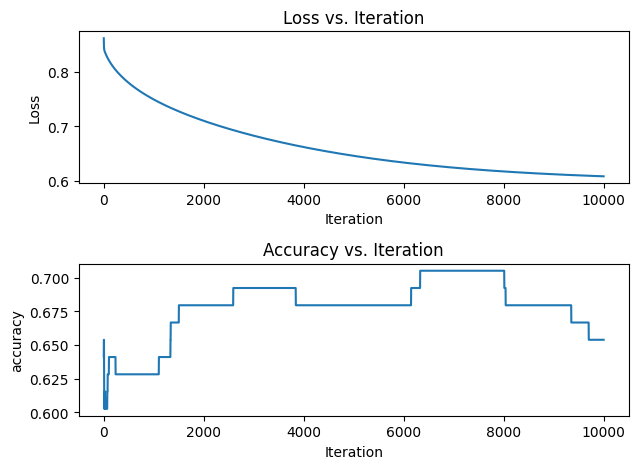

In [217]:
#validation loss vs validation accuracy

lr.plot()

### Comment on Convergence:
We can see that loss as well as accuracy plots seems to be stable or converge after 10000 iterations.

### Analysis:
We can see that plots take up stable value after any epochs. The training plot is smoother than validation plot. (Less number of validation samples maybe the cause.)

### Now trying out our model for different learning rates


Learning rate:  1


/tmp/ipykernel_9584/3011350643.py:11: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
/tmp/ipykernel_9584/3011350643.py:11: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


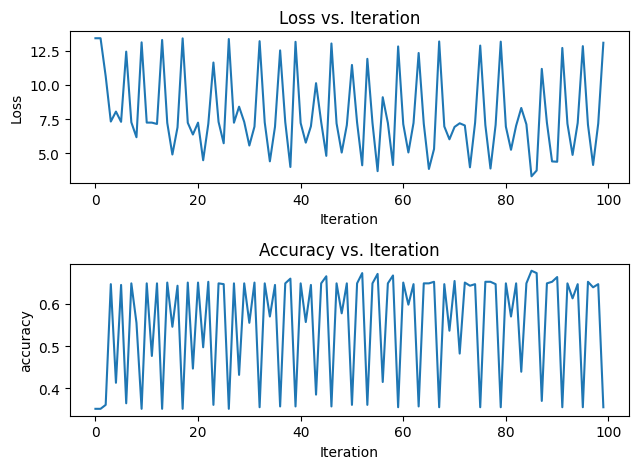

Learning rate:  0.1


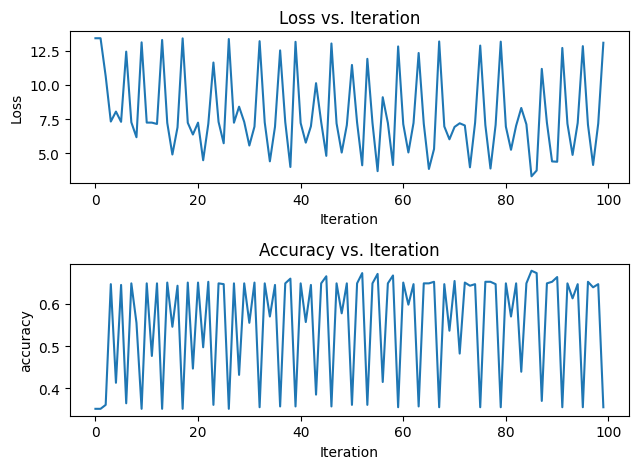

Learning rate:  0.01


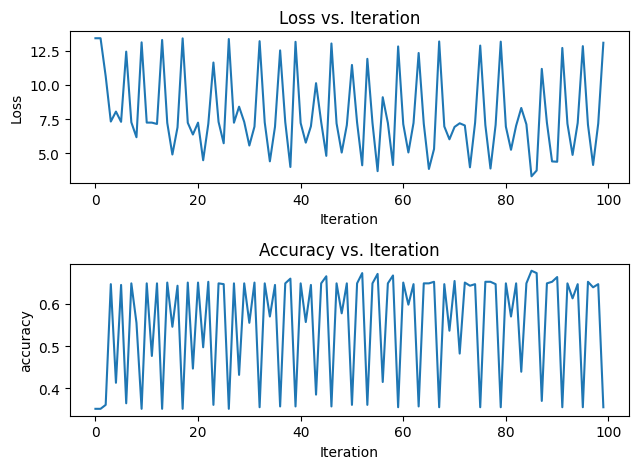

Learning rate:  0.001


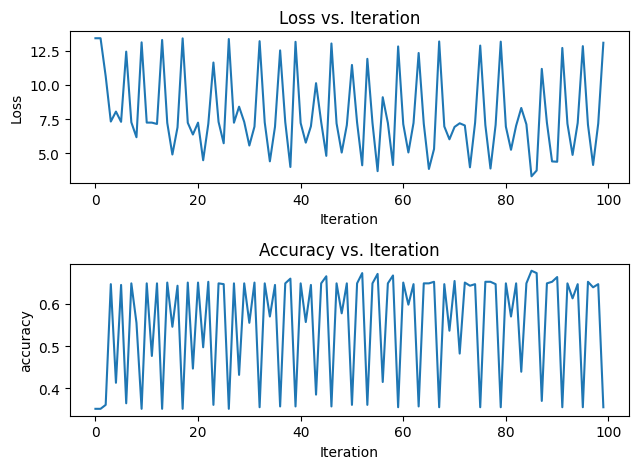

In [218]:

for l_r in [1,0.1,0.01,0.001]:
    print("Learning rate: ",l_r)
    lr = LogisticRegression(0.01,100,False)
    
    lr.fit(train_x,train_y)
    
    lr.plot()

Our model doesn't perform well for learning rates given above. Since the results are jumping randomly we might want to reduce learning rate further.

In [220]:
#Finding confusion matrix precision,recall and F1 score for different learning rates

def confusion_matrix(x,y):
    cmat = np.zeros((2,2))

    for i in range(x.shape[0]):
        if(x[i] == 1 and y[i] ==1):
            cmat[0,0]+=1
        elif(y[i]==1 and x[i]==0):
            cmat[0,1]+=1
        elif(y[i]==0 and x[i]==1):
            cmat[1,0]+=1
        else:
            cmat[1,1]+=1

    return cmat

def performance_print(cmat):
    precision = cmat[0,0]/(cmat[0,0]+cmat[1,0])

    recall = cmat[0,0]/(cmat[0,0]+cmat[0,1])
    
    accuracy = (cmat[0,0]+cmat[1,1])/(cmat[0,0] + cmat[0,1] + cmat[1,0] + cmat[1,1])
    
    f1 = 2*(precision*recall)/(precision+recall)
    
    
    print("Confusion matrix:\n",cmat)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("Accuracy: ",accuracy)
    print("F1 Score: ",f1)
    

for learning_rate in [1,0.1,0.01,0.001]:
    print("learning Rate: ",learning_rate)
    lr = LogisticRegression(learning_rate,10000,False)
    lr.fit(train_x,train_y)
    train_pred = lr.predict(train_x)
    performance_print(confusion_matrix(train_pred,train_y))
    print("\n")
    print("\n")
    
    




learning Rate:  1


/tmp/ipykernel_9584/3011350643.py:11: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
/tmp/ipykernel_9584/3011350643.py:11: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


Confusion matrix:
 [[184.   5.]
 [328.  20.]]
Precision:  0.359375
Recall:  0.9735449735449735
Accuracy:  0.37988826815642457
F1 Score:  0.5249643366619116




learning Rate:  0.1
Confusion matrix:
 [[184.   5.]
 [327.  21.]]
Precision:  0.36007827788649704
Recall:  0.9735449735449735
Accuracy:  0.3817504655493482
F1 Score:  0.5257142857142857




learning Rate:  0.01
Confusion matrix:
 [[184.   5.]
 [329.  19.]]
Precision:  0.3586744639376218
Recall:  0.9735449735449735
Accuracy:  0.3780260707635009
F1 Score:  0.5242165242165242




learning Rate:  0.001
Confusion matrix:
 [[ 14. 175.]
 [ 10. 338.]]
Precision:  0.5833333333333334
Recall:  0.07407407407407407
Accuracy:  0.6554934823091247
F1 Score:  0.13145539906103285






In [96]:
# Logistic regression with regularization

class LogisticRegression_reg:

    def __init__(self, learning_rate, epochs,reg,reg_param):
        self.learning_rate = learning_rate
        self.b = 0.01
        self.epochs = epochs
        self.reg = reg
        self.reg_param = reg_param
        self.w = np.ones(x.shape[1])

    def sigmoid(self, z):
        return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

    def forward_pass(self, x):
        z = np.dot(x, self.w) + self.b
        predictions = self.sigmoid(z)
        return predictions

    def binary_cross_entropy(self, pred):
        loss = -(self.y * np.log(pred + 1e-9) + (1 - self.y) * np.log(1 - pred + 1e-9))
        return np.mean(loss)

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.n = x.shape[0]
        self.loss = []
        self.accuracy = []  # Array to store accuracy values

        for epoch in range(self.epochs):
            predictions = self.forward_pass(x)
            
            dw = (1 / self.n) * np.dot(self.x.T, (predictions - self.y))
            db = (1 / self.n) * np.sum(predictions - self.y)

            if self.reg == 'l1':
                dw += (self.reg_param / self.n) * np.sign(self.w)
            elif self.reg == 'l2':
                dw += (2 * self.reg_param / self.n) * self.w
    
            print(dw,db)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            
            l = self.binary_cross_entropy(predictions)

            self.loss.append(l)

            accuracy = self.compute_accuracy(predictions, y)
            self.accuracy.append(accuracy)

            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {l:.4f}, Accuracy: {accuracy:.4f}, Learning Rate: {self.learning_rate:.6f}")

    def compute_accuracy(self, predictions, y):
        predicted_labels = np.where(predictions >= 0.5, 1, 0)
        correct_predictions = np.sum(predicted_labels == y)
        accuracy = correct_predictions / len(y)
        return accuracy

    def plot(self):
        plt.subplot(2,1,1)
        plt.plot(lr.loss)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss vs. Iteration')
        
        
        plt.subplot(2,1,2)
        plt.plot(lr.accuracy)
        plt.xlabel('Iteration')
        plt.ylabel('accuracy')
        plt.title('Accuracy vs. Iteration')
        
        plt.tight_layout()
        plt.show()


    def predict(self, data):
        z = np.dot(data, self.w) + self.b
        predictions = self.sigmoid(z)
        return np.where(predictions >= 0.5, 1, 0)


In [97]:
model = LogisticRegression_reg(0.0001,10000,'l2',0.001)

model.fit(train_x,train_y)

/tmp/ipykernel_9584/3663410375.py:14: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
/tmp/ipykernel_9584/3663410375.py:14: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


[ 2.12477095 71.20670764 44.00000372 12.6610838  43.72812291 19.40577654
  0.28484358 20.28864432] 0.6480446927374302
Epoch 1/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
[ 2.12477095 71.20670761 44.00000371 12.66108379 43.72812289 19.40577653
  0.28484358 20.28864431] 0.6480446927374302
Epoch 2/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
[ 2.12477095 71.20670758 44.00000369 12.66108379 43.72812287 19.40577652
  0.28484358 20.28864431] 0.6480446927374302
Epoch 3/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
[ 2.12477095 71.20670756 44.00000368 12.66108378 43.72812286 19.40577651
  0.28484358 20.2886443 ] 0.6480446927374302
Epoch 4/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
[ 2.12477095 71.20670753 44.00000366 12.66108378 43.72812284 19.40577651
  0.28484357 20.28864429] 0.6480446927374302
Epoch 5/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
[ 2.12477095 71.2067075  44.00000364 12.66108378 4

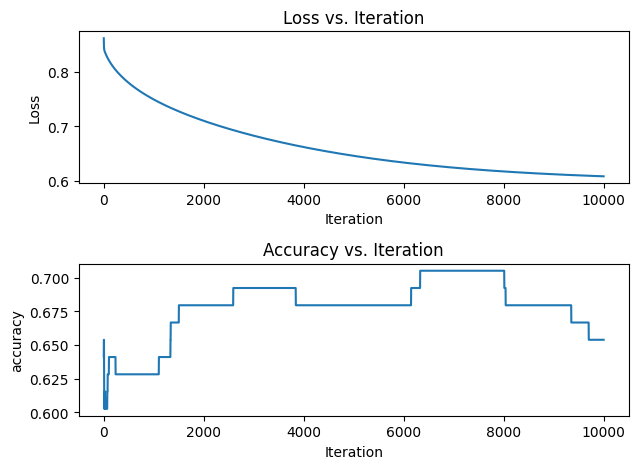

In [77]:
model.plot()

In [38]:
model.fit(val_x,val_y)

Epoch 1/10000, Loss: 0.8598, Accuracy: 0.6410, Learning Rate: 0.000100
Epoch 2/10000, Loss: 0.8528, Accuracy: 0.6538, Learning Rate: 0.000100
Epoch 3/10000, Loss: 0.8489, Accuracy: 0.6538, Learning Rate: 0.000100
Epoch 4/10000, Loss: 0.8462, Accuracy: 0.6538, Learning Rate: 0.000100
Epoch 5/10000, Loss: 0.8442, Accuracy: 0.6538, Learning Rate: 0.000100
Epoch 6/10000, Loss: 0.8426, Accuracy: 0.6410, Learning Rate: 0.000100
Epoch 7/10000, Loss: 0.8414, Accuracy: 0.6154, Learning Rate: 0.000100
Epoch 8/10000, Loss: 0.8404, Accuracy: 0.6154, Learning Rate: 0.000100
Epoch 9/10000, Loss: 0.8397, Accuracy: 0.6154, Learning Rate: 0.000100
Epoch 10/10000, Loss: 0.8390, Accuracy: 0.6154, Learning Rate: 0.000100
Epoch 11/10000, Loss: 0.8385, Accuracy: 0.6026, Learning Rate: 0.000100
Epoch 12/10000, Loss: 0.8380, Accuracy: 0.6026, Learning Rate: 0.000100
Epoch 13/10000, Loss: 0.8376, Accuracy: 0.6026, Learning Rate: 0.000100
Epoch 14/10000, Loss: 0.8372, Accuracy: 0.6026, Learning Rate: 0.000100
E

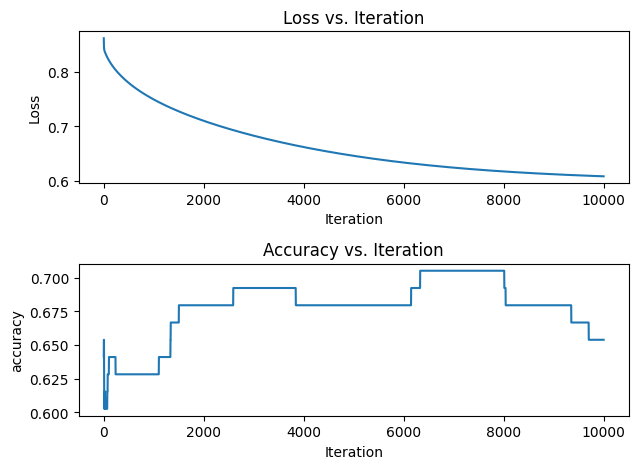

In [39]:
model.plot()

In [40]:
train_pred = model.predict(train_x)
performance_print(confusion_matrix(train_pred,train_y))

Confusion matrix:
 [[108.  81.]
 [108. 240.]]
Precision:  0.5
Recall:  0.5714285714285714
Accuracy:  0.6480446927374302
F1 Score:  0.5333333333333333


In [64]:
class LogisticRegression:

    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.b = 0.01
        self.epochs = epochs
        self.w = np.ones(x.shape[1])

    def sigmoid(self, z):
        return np.tanh(z)

    def forward_pass(self, x):
        z = np.dot(x, self.w) + self.b
        predictions = self.sigmoid(z)
        return predictions

    def binary_cross_entropy(self, pred):
        loss = -(self.y * np.log(pred + 1e-9) + (1 - self.y) * np.log(1 - pred + 1e-9))
        return np.mean(loss)

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.n = x.shape[0]
        self.loss = []
        self.accuracy = []  # Array to store accuracy values

        for epoch in range(self.epochs):
            predictions = self.forward_pass(x)
            dw = (1 / self.n) * np.dot(self.x.T, (predictions - self.y))
            db = (1 / self.n) * np.sum(predictions - self.y)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            l = self.binary_cross_entropy(predictions)
            self.loss.append(l)

            accuracy = self.compute_accuracy(predictions, y)
            self.accuracy.append(accuracy)

            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {l:.4f}, Accuracy: {accuracy:.4f}, Learning Rate: {self.learning_rate:.6f}")

    def compute_accuracy(self, predictions, y):
        predicted_labels = np.where(predictions >= 0.5, 1, 0)
        correct_predictions = np.sum(predicted_labels == y)
        accuracy = correct_predictions / len(y)
        return accuracy

    def plot(self):
        plt.subplot(2,1,1)
        plt.plot(lr.loss)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss vs. Iteration')
        
        
        plt.subplot(2,1,2)
        plt.plot(lr.accuracy)
        plt.xlabel('Iteration')
        plt.ylabel('accuracy')
        plt.title('Accuracy vs. Iteration')
        
        plt.tight_layout()
        plt.show()


    def predict(self, data):
        z = np.dot(data, self.w) + self.b
        predictions = self.sigmoid(z)
        return np.where(predictions >= 0.5, 1, 0)


In [65]:
model = LogisticRegression(0.0001,10000)



In [66]:
model.fit(train_x,train_y)

Epoch 1/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 2/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 3/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 4/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 5/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 6/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 7/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 8/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 9/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 10/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 11/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 12/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 13/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Rate: 0.000100
Epoch 14/10000, Loss: 13.4296, Accuracy: 0.3520, Learning Ra

/tmp/ipykernel_9584/2696361973.py:18: RuntimeWarning: invalid value encountered in log
  loss = -(self.y * np.log(pred + 1e-9) + (1 - self.y) * np.log(1 - pred + 1e-9))


Epoch 3728/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3729/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3730/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3731/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3732/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3733/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3734/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3735/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3736/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3737/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3738/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3739/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3740/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 3741/10000, Loss: nan, Accuracy: 0.5791, Learning Rate: 0.000100
Epoch 